# Project: Stock Price Prediction Using Linear Regression

## Step 1: Data Collection

In the first step of our project, I had collected the dataset that is essential for our stock price prediction model. The dataset I was already using is the historical stock price data of the S&P 500 index.

### Data Source

The data was obtained from [MarketWatch](https://www.marketwatch.com/), a reputable financial news and information website. MarketWatch provides historical data on various financial instruments, including stock indices, which is crucial for our analysis.

#### Data Details

- **Dataset Name**: S&P 500 Stock Price History
- **Source**: [MarketWatch](https://www.marketwatch.com/)
- **Data Format**: CSV (Comma-Separated Values)

### Data Collection Process

I retrieved the historical stock price data by accessing MarketWatch's data repository, where the S&P 500 stock price history is made available for analysis and research.

#### Data Availability

MarketWatch provides a comprehensive archive of historical stock price data, making it an ideal source for our project. This dataset contains records of daily stock prices, including opening price, closing price, high price, low price, volume, dividends, and stock splits.

The dataset's historical records date back to 1950, providing us with a rich source of data to work with.

#### Data Quality

I will assess the quality of the data during the data preprocessing stage, addressing any missing values and ensuring that the dataset is suitable for training and testing our stock price prediction model.


## Step 2: Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset from the CSV file
data = pd.read_csv("sp500.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [4]:
# Min-Max scaling to normalize the 'Open,' 'High,' 'Low,' 'Close,' and 'Volume' columns
def normalize_column(df, column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    df[column_name] = (df[column_name] - min_val) / (max_val - min_val)

# Normalize the columns
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in columns_to_normalize:
    normalize_column(data, col)

In [6]:
#Step 4: Split the data into training and testing sets
# Define the features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test for further use.

# Check the first few rows of the training data to confirm that it's properly normalized
X_train.head()

,Open,High,Low,Volume
5035,0.000000,0.015011,0.014740,0.000942
14855,0.175762,0.175235,0.170887,0.592345
542,0.004931,0.001464,0.001476,0.000106
7834,0.000000,0.024956,0.024510,0.005052
9102,0.049391,0.046533,0.046320,0.015546


## Step 3: Build Custom Linear Regression Model

In [7]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
    
    def fit(self, X, y):
        # Add a column of ones for the bias term (θ0)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Initialize model parameters θ with zeros
        self.theta = np.zeros(X_b.shape[1])
        
        for iteration in range(self.n_iterations):
            # Calculate the predictions using the current θ
            predictions = X_b.dot(self.theta)
            
            # Calculate the gradient of the Mean Squared Error cost function
            gradients = 2 / X_b.shape[0] * X_b.T.dot(predictions - y)
            
            # Update θ using gradient descent
            self.theta -= self.learning_rate * gradients
    
    def predict(self, X):
        # Add a column of ones for the bias term (θ0)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Predict the target variable using the trained θ
        return X_b.dot(self.theta)

    def get_parameters(self):
        return self.theta

In [8]:
# Create and train the custom linear regression model
model = CustomLinearRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train)

# Get the learned parameters θ
theta = model.get_parameters()

# Print the learned parameters
print("Learned Model Parameters (θ):", theta)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for evaluation
mse = ((y_pred - y_test) ** 2).mean()
print("Mean Squared Error (MSE) on Testing Data:", mse)

Learned Model Parameters (θ): [0.00141855 0.32358104 0.32532575 0.32522037 0.03588116]
Mean Squared Error (MSE) on Testing Data: 2.316296577458742e-05


## Step 4: Data Visualization

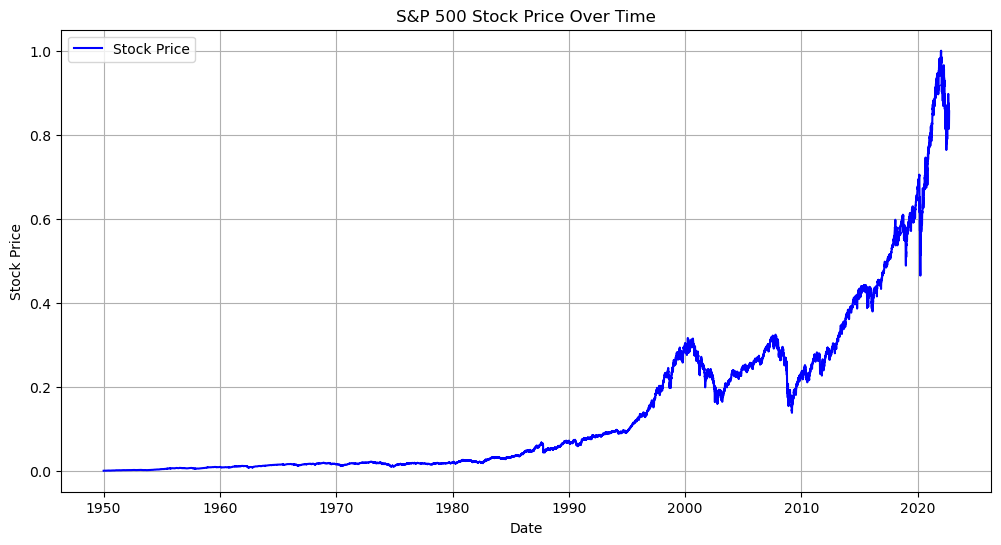

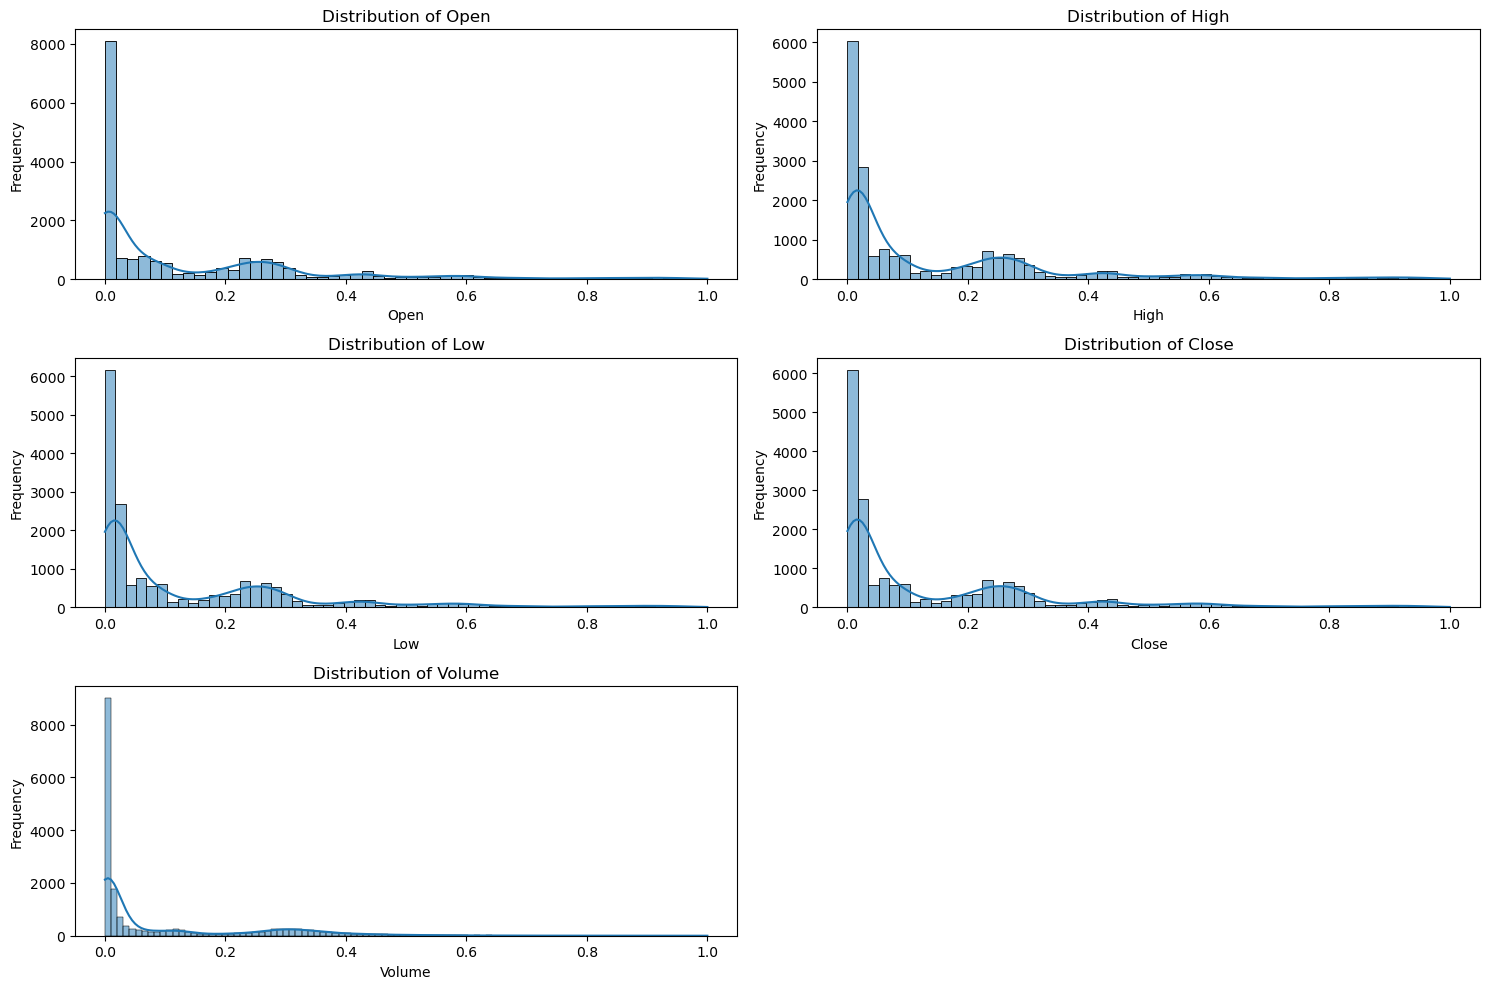

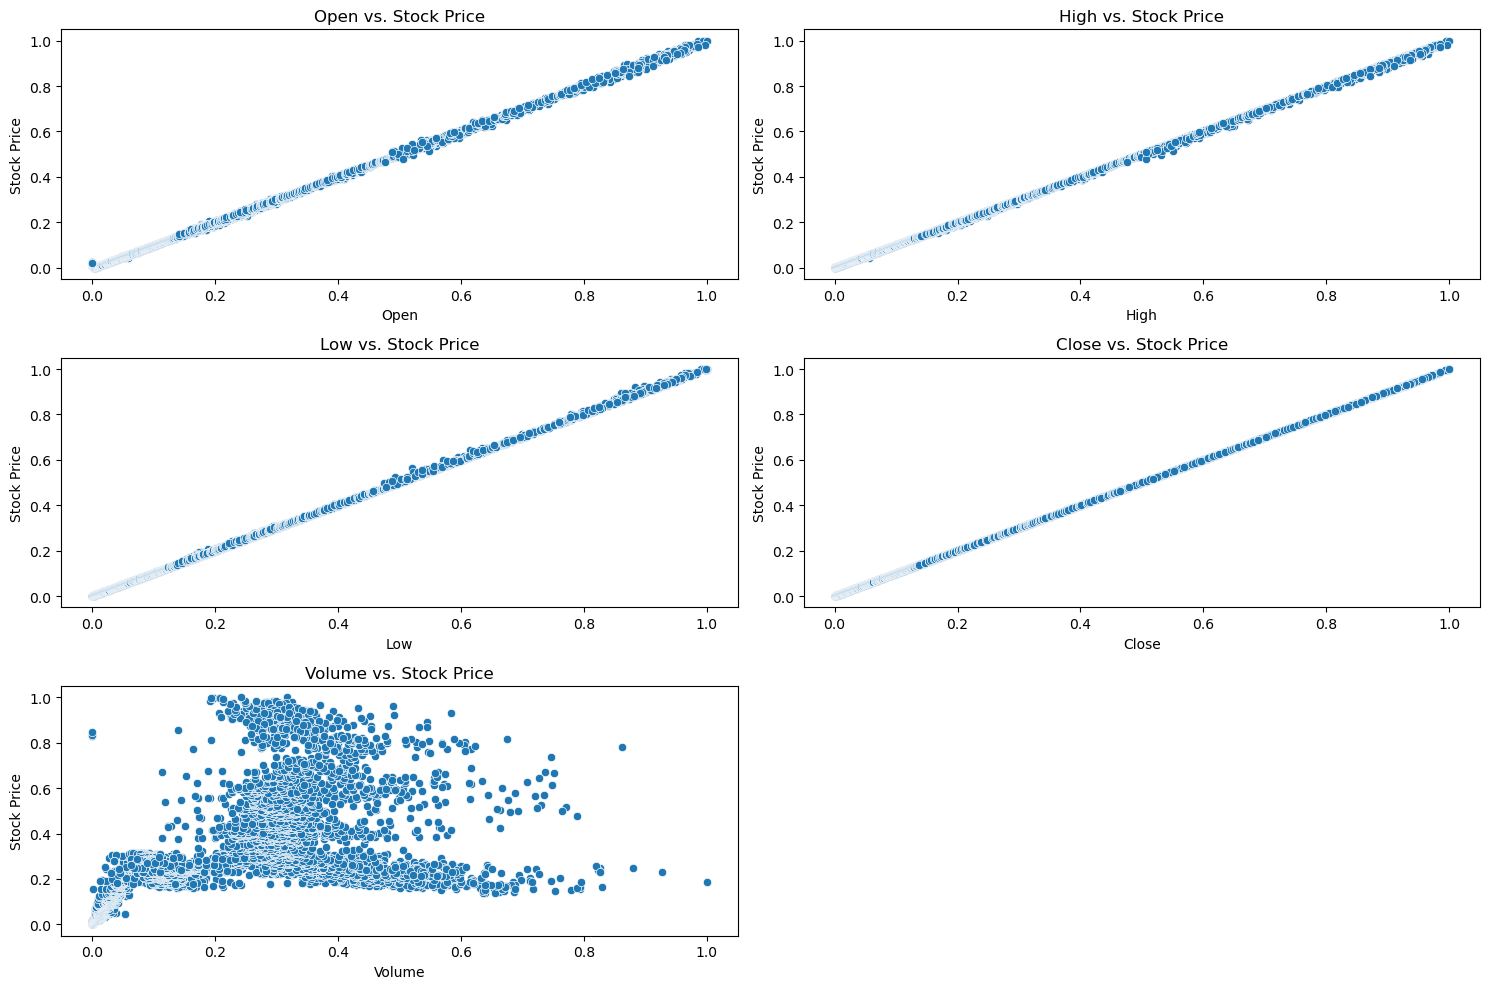

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot stock price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Stock Price', color='blue')
plt.title('S&P 500 Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

# Visualize feature distributions
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Use scatter plots to explore relationships between features and the target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=column, y='Close', data=data)
    plt.title(f'{column} vs. Stock Price')
    plt.xlabel(column)
    plt.ylabel('Stock Price')

plt.tight_layout()
plt.show()


In [33]:
# Create and train the custom linear regression model
model = CustomLinearRegression(learning_rate=0.01, n_iterations=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the learned parameters θ
theta = model.get_parameters()

# Print the learned parameters
print("Learned Model Parameters (θ):", theta)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate Mean Squared Error on the training data (for training progress monitoring)
mse_train = ((y_pred_train - y_train) ** 2).mean()
print("Mean Squared Error (MSE) on Training Data:", mse_train)


Learned Model Parameters (θ): [0.01396425 0.27969215 0.27689466 0.27601649 0.14002607]
Mean Squared Error (MSE) on Training Data: 0.00046695697768253474


In [24]:
# Make predictions on the testing data
y_pred_test = model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the testing data
mse_test = ((y_pred_test - y_test) ** 2).mean()

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Print the evaluation results
print("Mean Squared Error (MSE) on Testing Data:", mse_test)
print("Root Mean Squared Error (RMSE) on Testing Data:", rmse_test)


Mean Squared Error (MSE) on Testing Data: 0.0004699640291797554
Root Mean Squared Error (RMSE) on Testing Data: 0.021678653767698664


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Calculate training MSE
train_mse = mean_squared_error(y_train, y_pred_train)

# Calculate testing MSE
test_mse = mean_squared_error(y_test, y_pred_test)

# Print both MSE values
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Example: Adjust Model Complexity by Adding Polynomial Features
# You can experiment with different polynomial degrees
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train a new model using polynomial features
model_poly = CustomLinearRegression(learning_rate=0.01, n_iterations=1000)
model_poly.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred_test_poly = model_poly.predict(X_test_poly)

# Calculate the new testing MSE with polynomial features
test_mse_poly = mean_squared_error(y_test, y_pred_test_poly)

# Print the new testing MSE
print("Testing MSE with Polynomial Features:", test_mse_poly)


Training MSE: 0.00046695697768253474
Testing MSE: 0.0004699640291797554
Testing MSE with Polynomial Features: 0.0008444681377959545


In [45]:
# Hardcoded date for which you want to predict the stock price
new_date = '2022-09-15'

# Convert the new date to the datetime format
new_date = pd.to_datetime(new_date)

# Create a new DataFrame with the same features as X (Open, High, Low, Volume)
# You can use the training data as a reference for the column names
new_data = pd.DataFrame(data={'Open': [3932.669921875], 'High': [3959.474857688], 'Low': [3888.289921875], 'Close':[4107.27978515625], 'Volume': [1602969000]})



# Normalize the new data using the same scaling parameters as the training data
for col in columns_to_normalize:
    normalize_column(new_data, col)

# Extract the features from the new data
X_new = new_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Use your trained model to predict the stock price for the new data
predicted_price = model.predict(X_new)

# The variable 'predicted_price' now contains the predicted stock price for the specified date
# You can use it as needed




ValueError: shapes (1,6) and (5,) not aligned: 6 (dim 1) != 5 (dim 0)